In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
def analyze_numeric(df, column):
    print(df[column].describe())
    print()
    
    missing = df[column].isna().sum()
    lines = df.shape[0]
    print("missing values: " + str(missing) + "/" + str(lines) + " (" + str(missing / lines) + "%)")
    
    q1, q3 = df[column].quantile(0.25), df[column].quantile(0.75) 
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr) 
    out_upper = df[column][df[column] > upper_bound].shape[0]
    out_lower = df[column][df[column] < lower_bound].shape[0]
    print("outliers upper: " + str(out_upper) + "/" + str(lines) + " (" + str(out_upper / lines) + "%)")
    print("outliers lower: " + str(out_lower) + "/" + str(lines) + " (" + str(out_lower / lines) + "%)\n")
    
    fig, axs = plt.subplots(ncols=2, figsize=(15,5))
    sns.distplot(df[column].dropna(), kde_kws={"color": "b", "lw": 3}, ax=axs[0])
    sns.boxplot(df[column].dropna(), orient='v', ax=axs[1])    

## Books

In [147]:
books = pd.read_csv('../data/books.csv')

In [148]:
books.head(3)

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,NaN,1,['147734'],US,NaN,"[{'count': '1057', 'name': 'to-read'}, {'count...",B0056A00P4,True,4.04,B0056A00P4,...,NaN,NaN,NaN,https://www.goodreads.com/book/show/12182387-t...,https://s.gr-assets.com/assets/nophoto/book/11...,12182387,4,285263,"The Passion (Dark Visions, #3)","The Passion (Dark Visions, #3)"
1,NaN,2,['425995'],US,NaN,"[{'count': '1010', 'name': 'to-read'}, {'count...",B006KLYIAG,True,3.80,B006KLYIAG,...,NaN,NaN,NaN,https://www.goodreads.com/book/show/20135365-h...,https://s.gr-assets.com/assets/nophoto/book/11...,20135365,5,18450480,Hope's Daughter,Hope's Daughter
2,0698143760,17,['493993'],US,NaN,"[{'count': '1799', 'name': 'fantasy'}, {'count...",NaN,True,3.80,NaN,...,3.0,NaN,2014.0,https://www.goodreads.com/book/show/21401181-h...,https://images.gr-assets.com/books/1394747643m...,21401181,33,24802827,"Half Bad (Half Life, #1)","Half Bad (Half Life, #1)"


In [149]:
books.describe()

,text_reviews_count,average_rating,num_pages,publication_day,publication_month,publication_year,book_id,ratings_count,work_id
count,93398.000000,93398.000000,71695.000000,64937.000000,71315.000000,77895.000000,9.339800e+04,9.339800e+04,9.339800e+04
mean,101.913189,3.860503,298.943539,12.538907,6.330323,2010.706104,1.682098e+07,1.351242e+03,2.023518e+07
std,1159.965407,0.345687,240.386195,9.648199,3.310877,96.504383,9.993895e+06,2.885759e+04,1.688406e+07
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,5.000000e+01,0.000000e+00,6.200000e+01
25%,3.000000,3.660000,224.000000,3.000000,4.000000,2010.000000,8.887362e+06,1.500000e+01,3.600396e+06
50%,9.000000,3.870000,296.000000,11.000000,6.000000,2012.000000,1.733140e+07,4.800000e+01,1.750882e+07
75%,29.000000,4.090000,368.000000,21.000000,9.000000,2015.000000,2.483025e+07,1.840000e+02,2.766992e+07
max,142645.000000,5.000000,52015.000000,31.000000,12.000000,20045.000000,3.652450e+07,4.899965e+06,5.837702e+07


count    93398.000000
mean         3.860503
std          0.345687
min          0.000000
25%          3.660000
50%          3.870000
75%          4.090000
max          5.000000
Name: average_rating, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 366/93398 (0.003918713462815049%)
outliers lower: 1276/93398 (0.013661962782928971%)



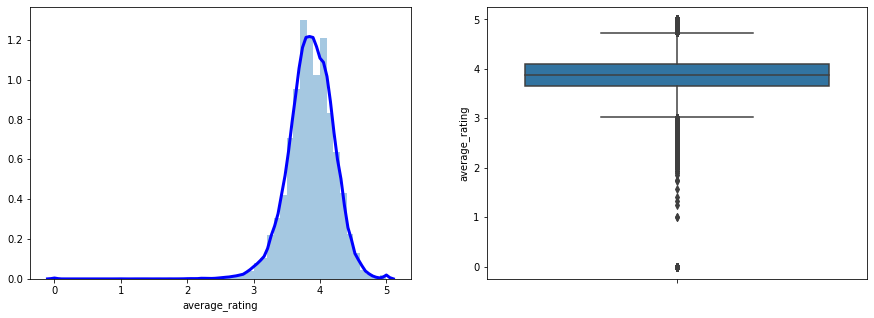

In [150]:
analyze_numeric(books, 'average_rating')

## Reviews

In [46]:
rev = pd.read_csv('../data/reviews.csv')

In [48]:
rev.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012,24,25
1,7504b2aee1ecb5b2872d3da381c6c91e,23302416,84c0936a0f9868f38e75d2f9a5cb761e,5,I read this book because my fifth grade son wa...,Wed Jan 21 18:40:59 -0800 2015,Wed Oct 26 03:44:13 -0700 2016,NaN,NaN,0,0
2,f8a89075dc6de14857561522e729f82c,18053080,785c8db878f4009da9741dea51f641da,4,Though the book started out slow and only star...,Sat Jan 11 17:58:41 -0800 2014,Tue Dec 02 11:43:07 -0800 2014,Sat Apr 12 00:00:00 -0700 2014,Fri Apr 11 00:00:00 -0700 2014,0,0


In [50]:
rev.describe(include='all')

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
count,2389900,2.389900e+06,2389900,2.389900e+06,2388621,2389900,2389900,2041459,1579237,2.389900e+06,2.389900e+06
unique,209152,NaN,2389900,NaN,2296734,2371220,2340529,828792,88651,NaN,NaN
top,59151b639f247aa97fffd5c71701db29,NaN,820e0ae4999dc42e4801d23ac1e998f9,NaN,3.5,Sun Feb 01 00:00:00 -0800 2015,Sun Aug 04 08:29:24 -0700 2013,Fri Jan 01 00:00:00 -0800 2016,Fri Jan 01 00:00:00 -0800 2016,NaN,NaN
freq,2438,NaN,1,NaN,4284,34,37,5130,2274,NaN,NaN
mean,NaN,1.352580e+07,NaN,3.764296e+00,NaN,NaN,NaN,NaN,NaN,1.269322e+00,3.033106e-01
std,NaN,8.617060e+06,NaN,1.259770e+00,NaN,NaN,NaN,NaN,NaN,1.030308e+01,2.460205e+00
min,NaN,5.000000e+01,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,-3.000000e+00,-3.000000e+00
25%,NaN,7.238737e+06,NaN,3.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,NaN,1.298713e+07,NaN,4.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
75%,NaN,1.869243e+07,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00


## Interactions

In [4]:
intr = pd.read_csv('../data/interactions.csv', nrows=100000)

In [5]:
intr.head(3)

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,8842281e1d1347389f2ab93d60773d4d,18667753,be53fe83a6fc83474052f84692f6e90a,False,0,NaN,Wed Mar 29 00:12:52 -0700 2017,Wed Mar 29 00:12:52 -0700 2017,NaN,NaN
1,8842281e1d1347389f2ab93d60773d4d,428263,2030f56879ebcc307a4b9cd8c83200e8,False,0,NaN,Mon Mar 27 22:01:42 -0700 2017,Mon Mar 27 22:01:42 -0700 2017,NaN,NaN
2,8842281e1d1347389f2ab93d60773d4d,11387515,2fd3cd1acb30b099c135e358669639da,False,0,NaN,Thu Jan 26 13:35:10 -0800 2017,Thu Jan 26 13:35:10 -0800 2017,NaN,NaN


In [6]:
intr.describe(include='all')

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
count,100000,1.000000e+05,100000,100000,100000.000000,7922,100000,100000,22055,17772
unique,1302,NaN,100000,2,NaN,7821,98934,98635,15447,10702
top,f8a89075dc6de14857561522e729f82c,NaN,033d87cdee33bb4742beebe325e70d06,False,NaN,This book is on the bibliography of books chal...,Fri Jun 08 12:48:05 -0700 2012,Mon Jul 01 01:03:41 -0700 2013,Fri Jan 01 00:00:00 -0800 2016,Sat Jun 03 00:00:00 -0700 2017
freq,2528,NaN,1,55082,NaN,26,12,34,130,29
mean,NaN,1.199138e+07,NaN,NaN,1.643070,NaN,NaN,NaN,NaN,NaN
std,NaN,8.973618e+06,NaN,NaN,2.022175,NaN,NaN,NaN,NaN,NaN
min,NaN,5.000000e+01,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.135798e+06,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.138430e+07,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.792690e+07,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
